In [105]:
import pickle
from skimage import io
from os.path import expanduser, join, exists
from os import listdir
import sys
import json
import urllib

def tmdb_get_poster_url(text):
    url = json.loads(text)['poster_path']
    if url == None:
        return None
    else:
        return "https://image.tmdb.org/t/p/w500" + json.loads(text)['poster_path']
    
def tmdb_get_release_date(text):
    return json.loads(text)['release_date']
    
def tmdb_get_tmdb_id(text):
    return json.loads(text)['id']

In [106]:
import pandas as pd
with open("year_poster_url_df.txt", "rb") as myfile:
    df = pickle.load(myfile)
    
# tidy up year
df = df.loc[df['year'] != '', :]
df.loc[:,'year'] = df.loc[:,'year'].apply(int)

# get decade
df['decade'] = df['year'].apply(lambda x: round(x/10, 0))

# tidy up poster_url
#df = df.loc[df['poster_url'] != None, :] don't know why this line does not work
index_list = []
for index, row in df.iterrows():
    if row['poster_url'] == None:
        index_list.append(index)
df.drop(index_list, inplace = True)

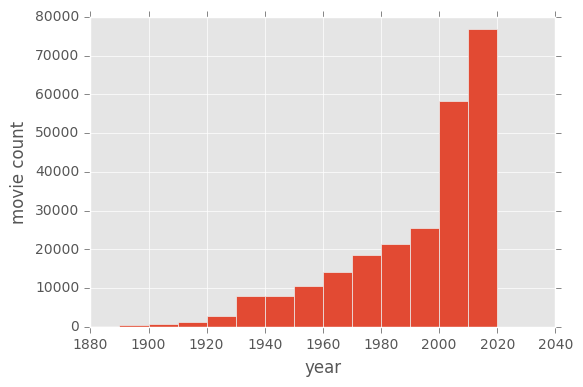

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.hist(df['year'], bins = range(1880, 2040, 10))
plt.xlabel("year")
plt.ylabel("movie count")
plt.show()

In [113]:
index_list = []
for index, row in df.iterrows():
    result = urllib.urlopen(row['poster_url'])
    df.loc[index, 'code'] = result.getcode()
    print "\r",index + 1, "/", df.shape[0],
    sys.stdout.flush()

329532 / 246929


In [114]:
print df.head()

   year                                         poster_url  decade   code
0  1988  https://image.tmdb.org/t/p/w500/gZCJZOn4l0Zj5h...   198.0  200.0
1  1986  https://image.tmdb.org/t/p/w500/7ad4iku8cYBuB0...   198.0  200.0
2  1995  https://image.tmdb.org/t/p/w500/eQs5hh9rxrk1m4...   199.0  200.0
3  1993  https://image.tmdb.org/t/p/w500/lNXmgUrP6h1nD5...   199.0  200.0
4  2006  https://image.tmdb.org/t/p/w500/8YyIjOAxwzD3fZ...   200.0  200.0


In [23]:
dir_path_1 = expanduser("~/tmdb_movie/")
dir_path_2 = expanduser("~/tmdb_movie_poster/")
movie_file_list = listdir(dir_path_1)

# get posters of all movies
for index, movie_file in enumerate(movie_file_list):
    # get movie text
    with open(join(dir_path_1, movie_file), "rb") as myfile:
        movie_text = pickle.load(myfile)
        
    # print progress
    print "\r",index,
    sys.stdout.flush()
    
    # check if poster exists
    poster_file_name = "tmdb_poster_" + str(tmdb_get_tmdb_id(movie_text)).zfill(6) + ".txt"
    if exists(join(dir_path_2, poster_file_name)):
        continue
    
    # get poster url
    poster_url = tmdb_get_poster_url(movie_text)
    
    # check if url exists
    if poster_url == None:
        continue
    else:
        try:
            # get poster
            poster = io.imread(poster_url)
        except:
            print index, movie_file, poster_url
        
        # pickle dump
        with open(join(dir_path_2, poster_file_name), "wb") as myfile:
            pickle.dump(poster, myfile)

77912

IOError: [Errno 28] No space left on device